In [287]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import qutip
import math

In [289]:
rabi = 1
h = 1 #6063e-34
detuning = 0.1

#1 particle Hamiltonian in laser
H_driv = qutip.Qobj([[0, h*rabi*0.5], [h*rabi*0.5, 0]])
H_det = qutip.Qobj([[0, 0], [0, -h*detuning]])
H = H_driv + H_det
print(H)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.   0.5]
 [ 0.5 -0.1]]


In [291]:
initial = qutip.basis(2, 0) # (1, 0) is the initial state (z basis?)

times = np.linspace(0, 10, 100) #times which the evolution will return the state vector

#evolve state and store expectation values
evolution = qutip.mesolve(H_driv, initial, times, [], [qutip.sigmax(), qutip.sigmay(), qutip.sigmaz()])

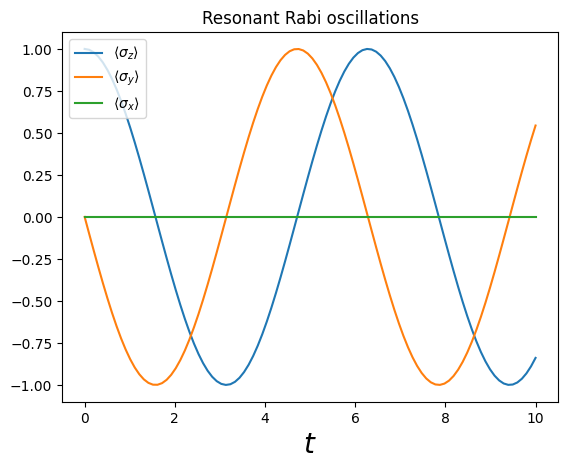

In [293]:
#proj_z = qutip.expect(qutip.sigmaz(), evolution.states) #z spin expectation values for each time step evolution
 
#plot results
fig, axes = plt.subplots(1, 1)

axes.plot(times, evolution.expect[2], label=r"$\left<\sigma_z\right>$")
axes.plot(times, evolution.expect[1], label=r"$\left<\sigma_y\right>$")
axes.plot(times, evolution.expect[0], label=r"$\left<\sigma_x\right>$")

axes.set_xlabel(r"$t$", fontsize=20)
axes.legend(loc=2)
axes.set(title='Resonant Rabi oscillations')
plt.show()

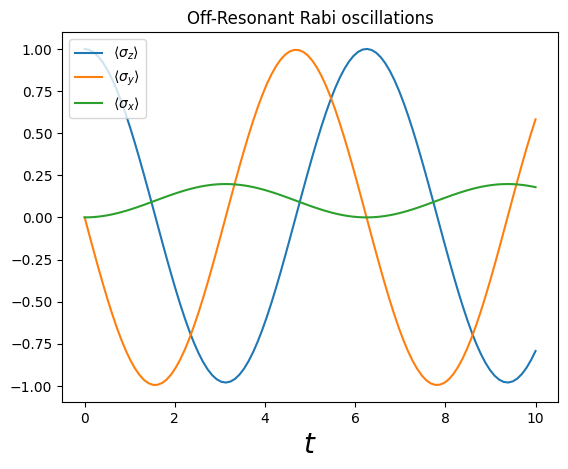

In [295]:
evolution2 = qutip.mesolve(H, initial, times, [], [qutip.sigmax(), qutip.sigmay(), qutip.sigmaz()])

#plot results
fig, axes = plt.subplots(1, 1)

axes.plot(times, evolution2.expect[2], label=r"$\left<\sigma_z\right>$")
axes.plot(times, evolution2.expect[1], label=r"$\left<\sigma_y\right>$")
axes.plot(times, evolution2.expect[0], label=r"$\left<\sigma_x\right>$")

axes.set_xlabel(r"$t$", fontsize=20)
axes.legend(loc=2)
axes.set(title='Off-Resonant Rabi oscillations')
plt.show()

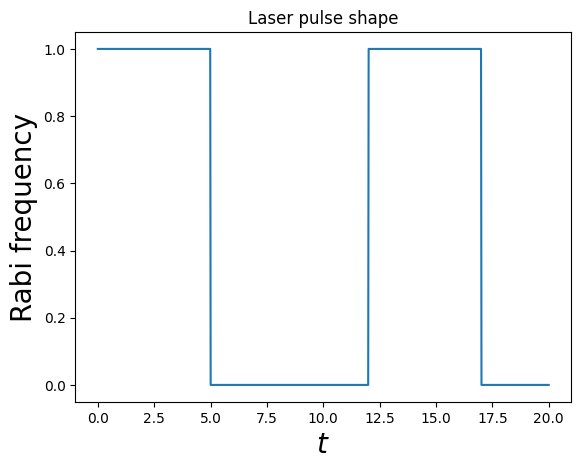

In [297]:
args = {'tau': 5, 'hold': 7} #pulse duration and hold time
rabi = 1
times = np.linspace(0, 20, 1000) #times which the evolution will return the state vector

def pulse(t, args):
    if t < args['tau']:
        return rabi
    elif t < args['tau'] + args['hold']:
        return 0 
    elif t < 2 * args['tau'] + args['hold']:
        return rabi
    else:
        return 0


value = []
for i in times:
    s = pulse(i, args)
    value = value + [s]

fig, axes = plt.subplots(1, 1)

axes.plot(times, value)
axes.set_xlabel(r"$t$", fontsize=20)
axes.set_ylabel(r"Rabi frequency", fontsize=20)
axes.set(title='Laser pulse shape')
plt.show()

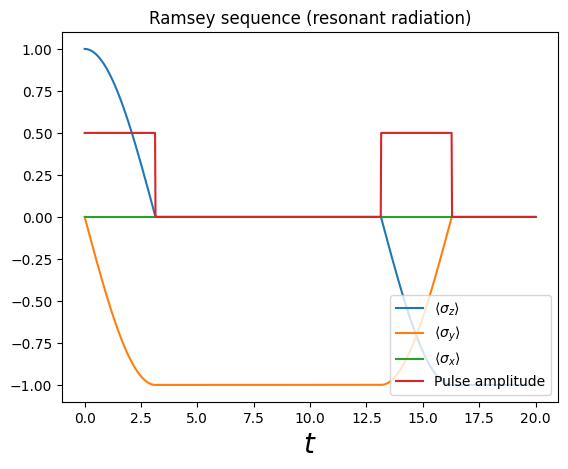

In [303]:
rabi = 0.5

args = {'tau': math.pi/(2*rabi), 'hold': 10} #pulse duration and hold time (pi/2 pulse)

H_pulse = [[H_driv, pulse]]

initial = qutip.basis(2, 0) # (1, 0) is the initial state (z basis?)

times = np.linspace(0, 20, 1000) #times which the evolution will return the state vector

#evolve state and store expectation values
evolution = qutip.mesolve(H_pulse, initial, times, [], [qutip.sigmax(), qutip.sigmay(), qutip.sigmaz()], args=args, options=qutip.Options(max_step=1e-4,nsteps=10000))


#plot results
fig, axes = plt.subplots(1, 1)

axes.plot(times, evolution.expect[2], label=r"$\left<\sigma_z\right>$")
axes.plot(times, evolution.expect[1], label=r"$\left<\sigma_y\right>$")
axes.plot(times, evolution.expect[0], label=r"$\left<\sigma_x\right>$")

axes.set_xlabel(r"$t$", fontsize=20)

#pulse graph
value = []
for i in times:
    s = pulse(i, args)
    value = value + [s]

axes.plot(times, value, label='Pulse amplitude')
axes.set_xlabel(r"$t$", fontsize=20)

axes.legend(loc=4)
axes.set(title='Ramsey sequence (resonant radiation)')
plt.show()

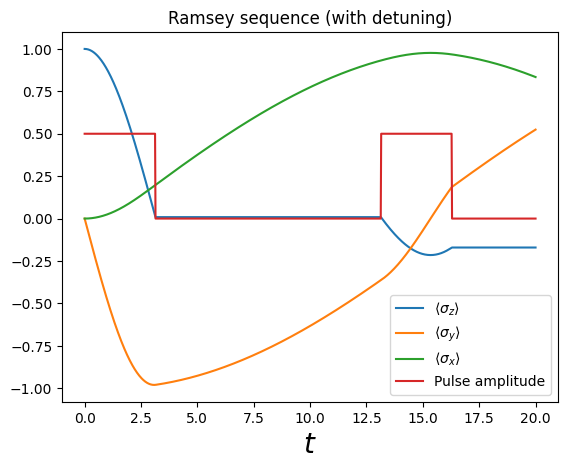

In [309]:
H_pulse1 = [[H_driv, pulse], H_det]


#evolve state and store expectation values
evolution3 = qutip.mesolve(H_pulse1, initial, times, [], [qutip.sigmax(), qutip.sigmay(), qutip.sigmaz()], args=args, options=qutip.Options(max_step=1e-4,nsteps=10000))


#plot results
fig, axes = plt.subplots(1, 1)

axes.plot(times, evolution3.expect[2], label=r"$\left<\sigma_z\right>$")
axes.plot(times, evolution3.expect[1], label=r"$\left<\sigma_y\right>$")
axes.plot(times, evolution3.expect[0], label=r"$\left<\sigma_x\right>$")

axes.set_xlabel(r"$t$", fontsize=20)

#pulse graph
value = []
for i in times:
    s = pulse(i, args)
    value = value + [s]

axes.plot(times, value, label='Pulse amplitude')
axes.set_xlabel(r"$t$", fontsize=20)

axes.legend(loc=4)
axes.set(title='Ramsey sequence (with detuning)')
plt.show()